In [118]:
import numpy as np
import seaborn as sns
from scipy.integrate import solve_ivp

In [119]:
def solver(timerange: tuple, initial_conditions: tuple, system, epsilon = 1):
  
  t0 = timerange[0]
  tN = timerange[1]
  print(tN)
  solution = solve_ivp(system, timerange, initial_conditions, t_eval = np.linspace(t0, tN, tN * 10), method='BDF')
  ts = solution.t
  us = solution.y[0]
  

  sns.lineplot(x = ts, y = us, label="u(t)")


200


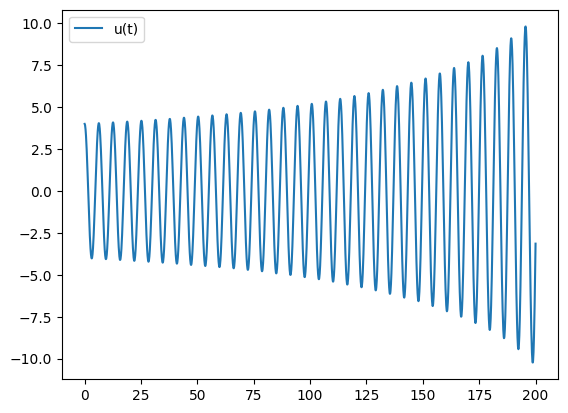

In [120]:
if __name__ == "__main__":
  u0_du0 = [4, 0]
  timerange = (0, 200)
  epsilon = 0.001

  def system(t, u):
    u1, u2 = u 
    du1_dt = u2
    du2_dt = -u1 + epsilon * u1*u2*(u1+u2)
    return [du1_dt, du2_dt]
  solver(timerange, u0_du0, system, epsilon)